In [3]:
import pandas as pnd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=1.5)

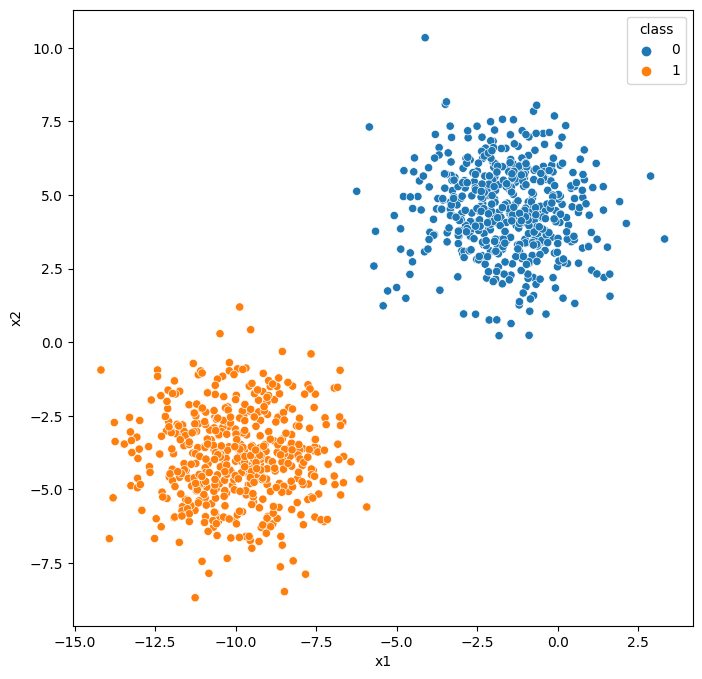

In [4]:
x_df= pnd.DataFrame(x, columns=["x1", "x2"])
y_df = pnd.DataFrame(y, columns=["class"])

dataset = pnd.concat([x_df, y_df], axis=1)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.scatterplot(x=x[:,0], y=x[:,1], hue='class', data=dataset)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

In [24]:
class Perceptron_v1():
    def __init__(self, data, epochs, seuil):
        self.data = data
        self.epochs = epochs
        self.seuil = seuil

    def fit(self):
        nombre_de_w = len(self.data.columns)-1
        ws = []

        for i in range(nombre_de_w):
            ws.append(0)

        #nombre de fois qu'on veut faire le calcul
        
        for i in range(self.epochs):
            for lines in self.data.iterrows():
                temp = 0
                #index de la valeur sauf le y
                for num in range(len(lines[1])-1):
                    temp += int(lines[1][num]) * int(ws[num])
                if temp >= self.seuil:
                    prediction = 1
                else:
                    prediction = 0

                error = lines[1][-1] - prediction

                for num in range(len(lines)-1):
                    ws[num] = ws[num] + error*lines[1][num]
        return ws
    
    
    
    
perc = Perceptron_v1(dataset, 100, -7)

[-3.6829147069204797, 0]


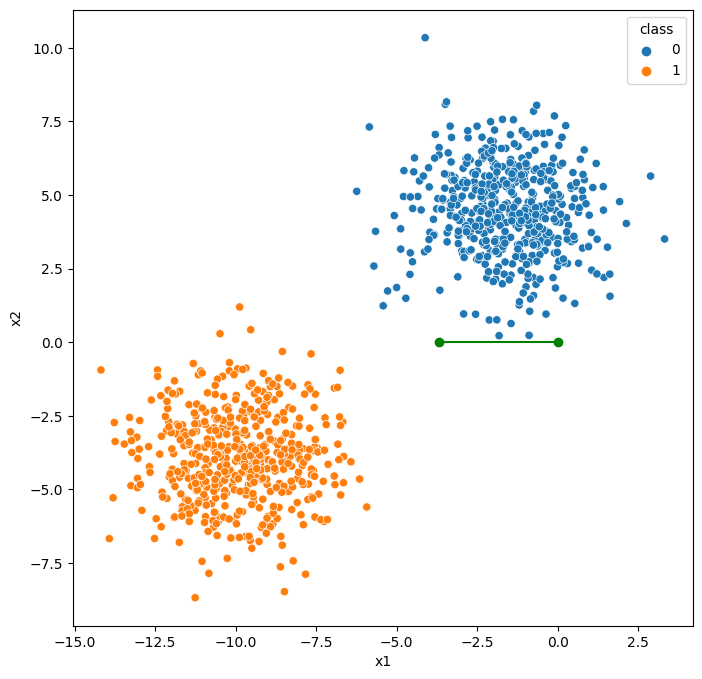

In [26]:
coeffs = perc.fit()
print(coeffs)
plt.figure(figsize=(8,8))
ax = plt.axes()
sns.scatterplot(x=x[:,0], y=x[:,1], hue='class', data=dataset)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.plot([coeffs[0], 0], [0, coeffs[1]], marker='o', color='green')

plt.show()